In [4]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [8]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

avarua ck
swindon gb
longyearbyen sj
jamestown sh
berberati cf
tumannyy ru
atuona pf
constitucion mx
geresk af
tasiilaq gl
east london za
itarema br
ushuaia ar
shingu jp
albany au
grand river south east mu
sanmenxia cn
ardistan ir
thompson ca
jamestown sh
ushuaia ar
castro cl
kefamenanu id
mataura pf
tsihombe mg
upernavik gl
bengkulu id
westport ie
albany au
hithadhoo mv
port elizabeth za
illoqqortoormiut gl
barrow us
butaritari ki
kharabali ru
sangar ru
kindia gn
barawe so
belushya guba ru
kathmandu np
arman ru
mataura pf
hambantota lk
soyo ao
coquimbo cl
buala sb
egvekinot ru
butaritari ki
sentyabrskiy ru
bredasdorp za
wundanyi ke
east london za
sicuani pe
hermanus za
albany au
lebu cl
busselton au
ushuaia ar
upata ve
vaini to
faanui pf
matagami ca
lexington us
port hardy ca
arandis na
bambous virieux mu
ereymentau kz
maunabo us
samusu ws
nioro ml
los llanos de aridane es
tiksi ru
killarney ca
mortka ru
albany au
hilo us
sola vu
taolanaro mg
tahara jp
butaritari ki
saldanha za
dhidhd

sao pedro do sul pt
severo-kurilsk ru
barrow us
magdagachi ru
hunza pk
castro cl
robertsport lr
antalaha mg
punta arenas cl
torbay ca
nanortalik gl
shumskiy ru
new norfolk au
praia cv
punta arenas cl
kapaa us
hobart au
saldanha za
husavik is
georgetown sh
puerto ayora ec
hermanus za
merauke id
yellowknife ca
gamboma cg
rawannawi ki
margate za
hobart au
samarai pg
upanema br
mgachi ru
hornepayne ca
nikolskoye ru
rikitea pf
nouakchott mr
bharatpur np
tuatapere nz
saldanha za
rikitea pf
le port re
poronaysk ru
carutapera br
makakilo city us
sandnessjoen no
georgetown sh
cape town za
svetlaya ru
rikitea pf
pangnirtung ca
meulaboh id
tuktoyaktuk ca
atuona pf
ngara tz
hobart au
lar gerd af
satitoa ws
samoded ru
avarua ck
cape town za
codrington ag
carnarvon au
iqaluit ca
sao joao do piaui br
codrington ag
bredasdorp za
dekar bw
hobart au
henties bay na
veinticinco de mayo ar
mehamn no
illoqqortoormiut gl
lasa cn
sao joao da barra br
taolanaro mg
svetlyy ru
saleaula ws
rikitea pf
busselton au

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

In [10]:
import requests
requests.__version__

'2.27.1'

In [11]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [12]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
    
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass


# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------") 

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | swindon
Processing Record 3 of Set 1 | longyearbyen
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | berberati
Processing Record 6 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | constitucion
Processing Record 9 of Set 1 | geresk
City not found. Skipping...
Processing Record 10 of Set 1 | tasiilaq
Processing Record 11 of Set 1 | east london
Processing Record 12 of Set 1 | itarema
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | shingu
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 17 of Set 1 | sanmenxia
Processing Record 18 of Set 1 | ardistan
City not found. Skipping...
Processing Record 19 of Set 1 | thompson
Processing Record 20 of Set 1 | castro
Proc

Processing Record 36 of Set 4 | srednekolymsk
Processing Record 37 of Set 4 | shimoda
Processing Record 38 of Set 4 | kuusamo
Processing Record 39 of Set 4 | port alfred
Processing Record 40 of Set 4 | marcona
City not found. Skipping...
Processing Record 41 of Set 4 | charters towers
Processing Record 42 of Set 4 | port hueneme
Processing Record 43 of Set 4 | kruisfontein
Processing Record 44 of Set 4 | riyadh
Processing Record 45 of Set 4 | rocha
Processing Record 46 of Set 4 | namtsy
Processing Record 47 of Set 4 | rapid valley
Processing Record 48 of Set 4 | tuatapere
Processing Record 49 of Set 4 | banda aceh
Processing Record 50 of Set 4 | mount gambier
Processing Record 1 of Set 5 | nuevo progreso
Processing Record 2 of Set 5 | quang ngai
Processing Record 3 of Set 5 | poum
Processing Record 4 of Set 5 | danshui
Processing Record 5 of Set 5 | sitka
Processing Record 6 of Set 5 | cruden bay
City not found. Skipping...
Processing Record 7 of Set 5 | mandera
Processing Record 8 of 

Processing Record 31 of Set 8 | poronaysk
Processing Record 32 of Set 8 | lethem
Processing Record 33 of Set 8 | puerto madero
Processing Record 34 of Set 8 | sao pedro do sul
Processing Record 35 of Set 8 | magdagachi
Processing Record 36 of Set 8 | hunza
City not found. Skipping...
Processing Record 37 of Set 8 | robertsport
Processing Record 38 of Set 8 | antalaha
Processing Record 39 of Set 8 | shumskiy
Processing Record 40 of Set 8 | praia
Processing Record 41 of Set 8 | gamboma
Processing Record 42 of Set 8 | rawannawi
City not found. Skipping...
Processing Record 43 of Set 8 | margate
Processing Record 44 of Set 8 | upanema
Processing Record 45 of Set 8 | mgachi
Processing Record 46 of Set 8 | hornepayne
Processing Record 47 of Set 8 | nouakchott
Processing Record 48 of Set 8 | bharatpur
Processing Record 49 of Set 8 | le port
Processing Record 50 of Set 8 | carutapera
Processing Record 1 of Set 9 | makakilo city
Processing Record 2 of Set 9 | sandnessjoen
Processing Record 3 of

Processing Record 20 of Set 12 | bodden town
Processing Record 21 of Set 12 | umm durman
City not found. Skipping...
Processing Record 22 of Set 12 | aksaray
Processing Record 23 of Set 12 | raurkela
City not found. Skipping...
Processing Record 24 of Set 12 | kondinskoye
Processing Record 25 of Set 12 | alice springs
Processing Record 26 of Set 12 | kananga
Processing Record 27 of Set 12 | ternate
Processing Record 28 of Set 12 | falealupo
City not found. Skipping...
Processing Record 29 of Set 12 | manaus
Processing Record 30 of Set 12 | hayden
Processing Record 31 of Set 12 | martapura
Processing Record 32 of Set 12 | binzhou
Processing Record 33 of Set 12 | anadyr
Processing Record 34 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 35 of Set 12 | iquitos
Processing Record 36 of Set 12 | elko
Processing Record 37 of Set 12 | edd
Processing Record 38 of Set 12 | rio gallegos
Processing Record 39 of Set 12 | preston
Processing Record 40 of Set 12 | gladstone
Proces

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Avarua,-21.2078,-159.7750,80.65,83,40,11.50,CK,2022-03-26 21:04:53
1,Swindon,51.5580,-1.7812,53.24,81,0,9.22,GB,2022-03-26 21:04:53
2,Longyearbyen,78.2186,15.6401,-4.16,84,20,11.50,SJ,2022-03-26 21:04:54
3,Jamestown,42.0970,-79.2353,35.24,66,100,14.97,US,2022-03-26 21:04:54
4,Berberati,4.2612,15.7922,75.94,40,81,1.81,CF,2022-03-26 21:04:54
5,Atuona,-9.8000,-139.0333,79.39,76,48,17.49,PF,2022-03-26 21:04:55
6,Constitucion,-35.3333,-72.4167,60.39,71,63,9.57,CL,2022-03-26 21:00:56
7,Tasiilaq,65.6145,-37.6368,23.16,64,2,3.58,GL,2022-03-26 21:04:55
8,East London,-33.0153,27.9116,66.96,88,96,10.58,ZA,2022-03-26 21:04:56
9,Itarema,-2.9248,-39.9167,79.54,82,99,10.20,BR,2022-03-26 21:04:56


In [15]:
# Reorder the column order
new_column_order = ["City", "Country", "Date", "Lat","Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [16]:
city_data_df = city_data_df[new_column_order]

In [17]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Avarua,CK,2022-03-26 21:04:53,-21.2078,-159.7750,80.65,83,40,11.50
1,Swindon,GB,2022-03-26 21:04:53,51.5580,-1.7812,53.24,81,0,9.22
2,Longyearbyen,SJ,2022-03-26 21:04:54,78.2186,15.6401,-4.16,84,20,11.50
3,Jamestown,US,2022-03-26 21:04:54,42.0970,-79.2353,35.24,66,100,14.97
4,Berberati,CF,2022-03-26 21:04:54,4.2612,15.7922,75.94,40,81,1.81
...,...,...,...,...,...,...,...,...,...
551,Acapulco,MX,2022-03-26 21:08:03,16.8634,-99.8901,82.22,65,100,12.66
552,Calauan,PH,2022-03-26 21:08:04,14.1500,121.3167,80.98,89,19,4.76
553,Miri,MY,2022-03-26 21:08:04,4.4148,114.0089,73.56,90,43,5.61
554,Kumluca,TR,2022-03-26 21:08:04,36.3703,30.2869,54.43,45,0,5.97


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [21]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1648329673.483394

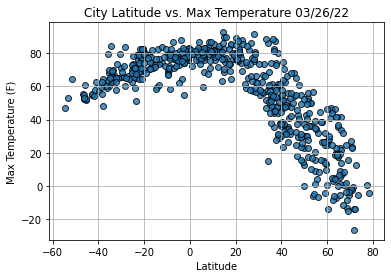

In [23]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

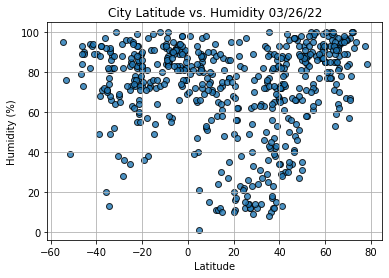

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

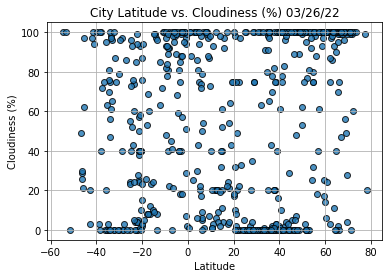

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

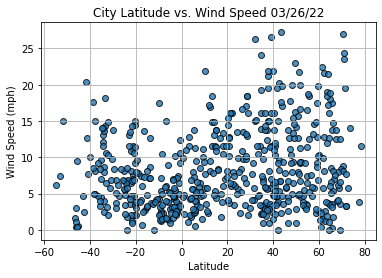

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [27]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [28]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [29]:
# To create a new DataFrame from a current DataFrame, 
# we can use the loc method on the current DataFrame
index13 = city_data_df.loc[13]
index13

City                    Sanmenxia
Country                        CN
Date          2022-03-26 21:04:57
Lat                       34.7747
Lng                      111.1814
Max Temp                    48.92
Humidity                       36
Cloudiness                     98
Wind Speed                   2.13
Name: 13, dtype: object

In [30]:
 # Filter a DataFrame based on a value of a row.
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3       True
4       True
       ...  
551     True
552     True
553     True
554     True
555    False
Name: Lat, Length: 556, dtype: bool

In [31]:
# Return a DataFrame with all data fitting the criteria, 
# for latitudes greater than or equal to 0, we can use the 
# loc method 
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Swindon,GB,2022-03-26 21:04:53,51.5580,-1.7812,53.24,81,0,9.22
2,Longyearbyen,SJ,2022-03-26 21:04:54,78.2186,15.6401,-4.16,84,20,11.50
3,Jamestown,US,2022-03-26 21:04:54,42.0970,-79.2353,35.24,66,100,14.97
4,Berberati,CF,2022-03-26 21:04:54,4.2612,15.7922,75.94,40,81,1.81
7,Tasiilaq,GL,2022-03-26 21:04:55,65.6145,-37.6368,23.16,64,2,3.58


In [32]:
 # Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

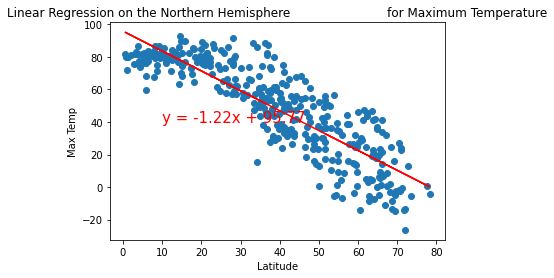

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

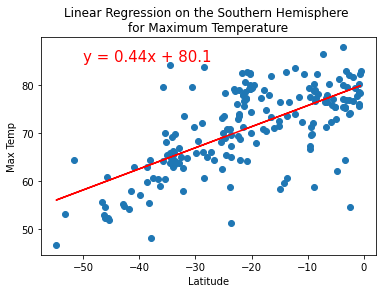

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,"Linear Regression on the Southern Hemisphere \nfor Maximum Temperature", 'Max Temp',(-50,85))

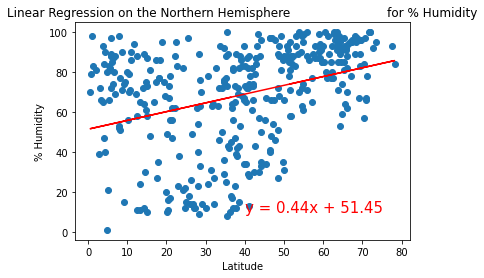

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

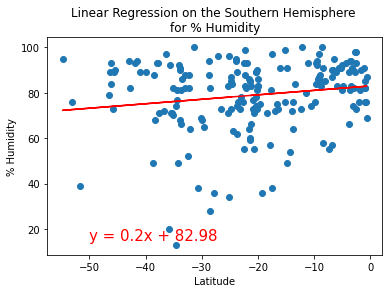

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

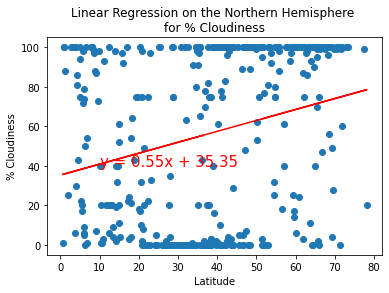

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(10,40))

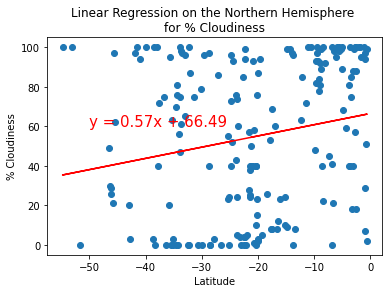

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

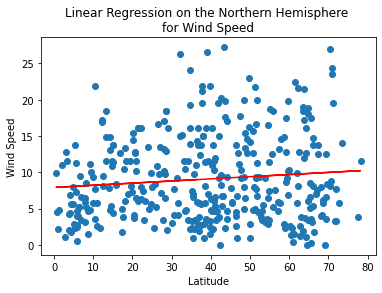

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

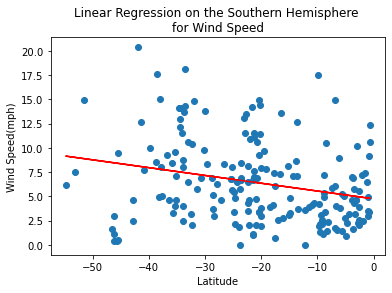

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed','Wind Speed(mph)',(-50,35))

In [4]:
conda install -c conda-forge gmaps

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\gotar\anaconda3\envs\PythonData

  added / updated specs:
    - gmaps


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.10.8  |       h5b45459_0         176 KB  conda-forge
    certifi-2021.10.8          |   py37h03978a9_1         145 KB  conda-forge
    geojson-2.5.0              |             py_0          15 KB  conda-forge
    gmaps-0.9.0                |             py_0         1.7 MB  conda-forge
    openssl-1.1.1n             |       h8ffe710_0         5.7 MB  conda-forge
    python_abi-3.7             |          2_cp37m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         7.8 MB

The following NEW packages will be INSTALLED:

  geojson            conda-forge/noarch::geo



==> WARNING: A newer version of conda exists. <==
  current version: 4.11.0
  latest version: 4.12.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [5]:
pip install gmaps

Note: you may need to restart the kernel to use updated packages.
